Import all necessary modules in the code cell below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the "cust_seg.csv" file using Pandas' read_csv() function. 

Then drop the first column of the data (the one without a column-name). 

Use Pandas' head() function to view the first few records.

In [2]:
df = pd.read_csv('cust_seg.csv')
df.head(2)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8


Use describe() on your Pandas' dataframe to display a statistical summary of the dataset.

In [3]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


Display 4 histograms to show the distributions for (a) Age, (b) Income, (c) Years Employed and (d) DebtIncomeRatio.

In [6]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

<AxesSubplot:xlabel='DebtIncomeRatio', ylabel='Count'>

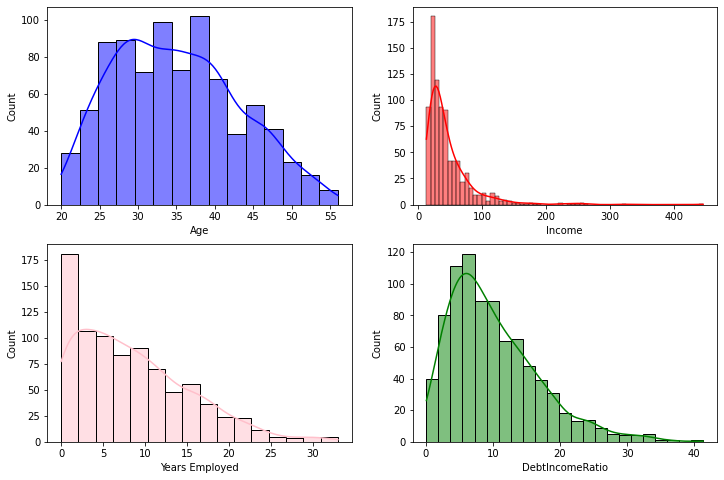

In [12]:
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
sns.histplot(data=df, x='Age', ax=ax[0,0], kde=True, color='blue')
sns.histplot(data=df, x='Income', ax=ax[0,1], kde=True, color='red')
sns.histplot(data=df, x='Years Employed', ax=ax[1,0], kde=True, color='pink')
sns.histplot(data=df, x='DebtIncomeRatio', ax=ax[1,1], kde=True, color='green')

Display the count (using seaborn's countplot()) to show the count difference between defaults and non-defaults. 

Print out the number of Default and Non-Default cases.

Print out the percentage of Default cases.

[Text(0, 0, 'Non-default'), Text(1, 0, 'Default')]

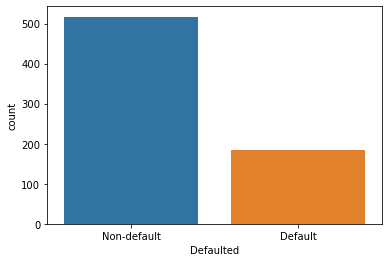

In [17]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='Defaulted', ax=ax)
ax.set_xticklabels(['Non-default', 'Default'])

Using Seaborn's scatterplot() function, plot "Years Employed" (x-axis) vs "Income" (y-axis). 

Set the "hue" parameter of scatterplot() to match the "Defaulted" column of the data so that we can tell whether a data point on the plot is a Defaulted or Non-Defaulted case. 

Set the "size" parameter of scatterplot() to match the "DebtIncomeRatio" so that a record with high Debt Income Ratio will be rendered bigger than one with a smaller Debt Income Ratio.

[Text(0.5, 1.0, 'Income/Years Employed/Debt Income Ratio')]

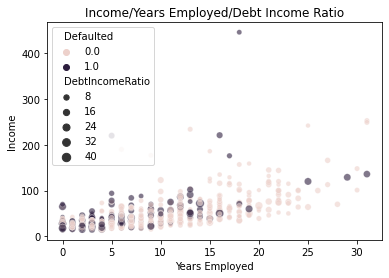

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Years Employed', y='Income', hue='Defaulted', ax=ax,
               size='DebtIncomeRatio', alpha=0.6)
ax.set(title='Income/Years Employed/Debt Income Ratio')

Use Pandas' drop() to remove the "Customer Id" column from our dataframe. 

Use head() to verify that the column has been removed. 

In [23]:
df.drop(['Customer Id'], inplace=True, axis=1)

In [25]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

Split our dataset into two smaller sets - one with valid values (e.g. 0.0 or 1.0) in the Defaulted column and the other where the Defaulted value is empty/null.


In [31]:
filled_defaulted = df[df['Defaulted'].notna()]

empty_defaulted = df[df['Defaulted'].isna()]
print(filled_defaulted.shape, empty_defaulted.shape)

(700, 8) (150, 8)


Create and Train a KNN model to predict if a given record has a default or non-default status. Use only those records with valid values in the Defaulted column.

The X_train data would consist of all rows with a Defaulted value. All columns are used for training, except the 'Defaulted' column.

The y_train data would consist of all rows with a value in the Defaulted column.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [36]:
filled_defaulted

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [48]:
x_train = filled_defaulted.drop(['Defaulted'], axis=1)
y_train = filled_defaulted['Defaulted']

x_test = empty_defaulted.drop(['Defaulted'], axis = 1)

In [56]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [59]:
df.head(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8


In [60]:
for i in range(len(y_pred)):
    df.iloc[empty_defaulted.index[i]:,6] = y_pred[i]

In [61]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Feed records with missing Default value (e.g. no value in the Defaulted column) into our KNN model to predict whether they would have a Default (1.0) or Non-Default value (0.0). Use KNN's predict() function to do so.

Print out the predicted Defaulted values.

Update our dataframe using the predicted Defaulted values, such that all records that initally have missing Defaulted values are now replaced with their respective predicted Defaulted value (either 0.0 or 1.0).

In [66]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Compute and plot the WCSS for 1 to 10 clusters. From the generated WCSS graph, deduce the optimal number of clusters for our dataset using the elbow method.

In [68]:
from sklearn.cluster import KMeans

wcss = []
X = df.values
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

C:\Users\ASUS\anaconda3\envs\mlexercise\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [71]:
wcss

[1407954.9256761665,
 655886.1301198011,
 381799.3171098569,
 262005.12725795168,
 213624.16528359678,
 178983.52806498404,
 156921.04064998784,
 139605.16413510963,
 127203.4085642923,
 119335.67475339162]

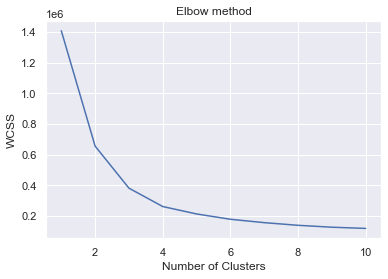

In [73]:
sns.set(style='darkgrid')
sns.lineplot(x=range(1,11), y=wcss)
plt.title("Elbow method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Perform KMeans clustering on the dataset using the number of clusters deduced from the WCSS plot.

Print out the cluster-allocation for each record in our dataset.

In [74]:
model_updated = KMeans(n_clusters=4)
Y = model_updated.fit_predict(X)
Y

array([0, 2, 3, 0, 1, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 2, 3, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 2, 3, 3, 3, 2, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 2, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       1, 0, 2, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 0,
       3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,

Display Scatter plots to display the clustering of results of our dataset. Each data point displayed in the plots should have an unique color that represents the cluster that it is being assigned to.

(a) Create a Scatter plot for Age (x-axis) vs Income (y-axis)

(b) Create a Scatter plot for DebtIncomeRation (x-axis) vs Income (y-axis)

In [76]:
df.head(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8


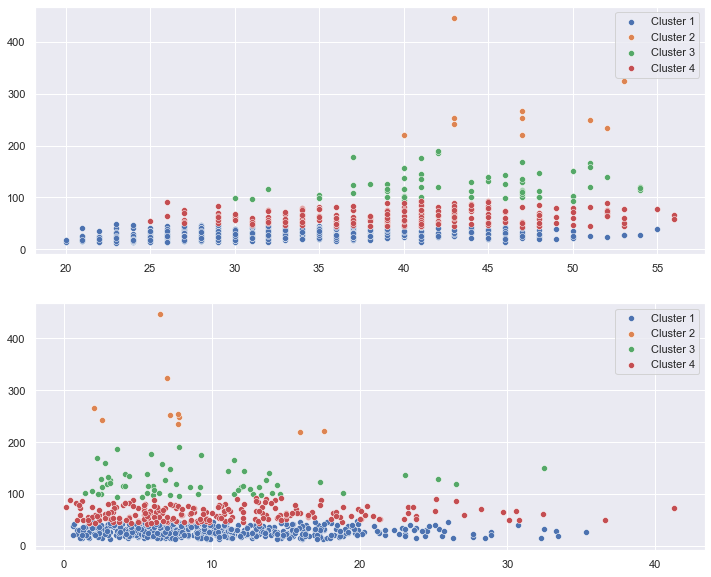

In [77]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))

for i in np.unique(Y):
    bool_arr = (i==Y)
    
    sns.scatterplot(x=X[bool_arr, 0], y=X[bool_arr, 3], label='Cluster ' + str(i+1), ax=ax[0])
    sns.scatterplot(x=X[bool_arr, -1], y=X[bool_arr, 3], 
                   label="Cluster " + str(i+1), ax=ax[1])

Create a 3D plot with values from Age (x-axis), Income (y-axis) and DebtIncomeRatio (z-axis) columns. 

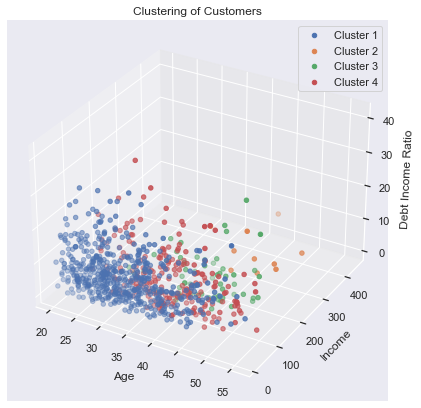

In [79]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(Y):
    ax.scatter(xs=X[Y == i, 0],
              ys=X[Y == i, 3],
              zs=X[Y == i, -1],
              label='Cluster ' + str(i+1))
ax.set_xlabel("Age")
ax.set_ylabel('Income')
ax.set_zlabel('Debt Income Ratio')
ax.set_title("Clustering of Customers")
plt.legend()
plt.show()
    